## Chap 2.6: Feature engineering


The process of feature engineering is of manipulating, transforming, selecting raw data into features that can be used in statistical analysis of prediction.

In this tutorial, we will construct data features from time series and images. We will cover 3 classes of features: statistical, temporal, and spectral.

WE wil






In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

https://archive.ics.uci.edu/ml/datasets/Ozone%20Level%20Detection

In [2]:
url_8hr_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data"
url_8hr_cols = "https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.names"

In [3]:
get_col = lambda c: c.split(":")[0].strip()
cols_8hr = pd.read_csv(url_8hr_cols)["1"].apply(get_col).values

In [4]:
print(cols_8hr)

['Date' 'WSR0' 'WSR1' 'WSR2' 'WSR3' 'WSR4' 'WSR5' 'WSR6' 'WSR7' 'WSR8'
 'WSR9' 'WSR10' 'WSR11' 'WSR12' 'WSR13' 'WSR14' 'WSR15' 'WSR16' 'WSR17'
 'WSR18' 'WSR19' 'WSR20' 'WSR21' 'WSR22' 'WSR23' 'WSR_PK' 'WSR_AV' 'T0'
 'T1' 'T2' 'T3' 'T4' 'T5' 'T6' 'T7' 'T8' 'T9' 'T10' 'T11' 'T12' 'T13'
 'T14' 'T15' 'T16' 'T17' 'T18' 'T19' 'T20' 'T21' 'T22' 'T23' 'T_PK' 'T_AV'
 'T85' 'RH85' 'U85' 'V85' 'HT85' 'T70' 'RH70' 'U70' 'V70' 'HT70' 'T50'
 'RH50' 'U50' 'V50' 'HT50' 'KI' 'TT' 'SLP' 'SLP_' 'Precp']


In [5]:
df_8hr = pd.read_csv(
    url_8hr_data, 
    header=None, 
    names=list(cols_8hr) + ["label"], 
    na_values="?",
    parse_dates=["Date"],
    index_col="Date",
    dtype="float32"
,)
df_8hr["label"] = df_8hr["label"].astype(np.int8)
df_8hr.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,label
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.900000,10330.0,-55.0,0.00,0
1998-01-02,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805.0,14.05,29.000000,10275.0,-55.0,0.00,0
1998-01-03,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.60,6.94,9.80,5790.0,17.90,41.299999,10235.0,-40.0,0.00,0
1998-01-04,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775.0,31.15,51.700001,10195.0,-40.0,2.08,0
1998-01-05,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


In [13]:
print(df_8hr.index)

DatetimeIndex(['1998-01-01', '1998-01-02', '1998-01-03', '1998-01-04',
               '1998-01-05', '1998-01-06', '1998-01-07', '1998-01-08',
               '1998-01-09', '1998-01-10',
               ...
               '2004-12-22', '2004-12-23', '2004-12-24', '2004-12-25',
               '2004-12-26', '2004-12-27', '2004-12-28', '2004-12-29',
               '2004-12-30', '2004-12-31'],
              dtype='datetime64[ns]', name='Date', length=2534, freq=None)


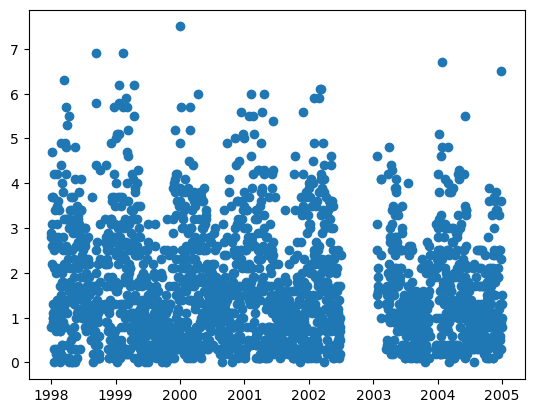

In [14]:
plt.plot_date(df_8hr.index,df_8hr["WSR0"])

hourly features:

- WSR<0-23>: wind speed data, numb indicates the hour of that day
- T<0-23>: temperature data, numb indicates the hour of that day

daily features:

- WSR_PK: Peak wind speed of that day
- WSR_AV: Average wind speed of that day
- T_PK: Peak Temperature of that day
- T_AV: Average Temperature of that day
- KI: K-index - measure of thunderstorm potential based on vertical temperature lapse rate, see here
- TT: T-Totals - index used to assess storm strength, see here
- SLP, SLP_: Sea level pressure, _ indicates pressure from the previous day.
- V<50-85: V-wind - N-S direction wind at 500, 700, 850 hpa level
- U<50-85: U-wind - E-W direction wind at 500, 700, 850 hpa level
- HT<50-85>: Geopotential height at 500, 700, 850 hpa

In [15]:
# Create a hourly dataframe (withholds only WSR and T features)
df_daily = pd.DataFrame(index=df_8hr.index)
dfs = [df_daily]
for hour in range(1, 24):
    dfs += [pd.DataFrame(index=pd.to_datetime(df_daily.index + np.timedelta64(hour, "h")))]
df_hourly = pd.concat(dfs).sort_index()

# Add the hourly wind speed values
wsr_cols = [f"WSR{h}" for h in range(24)]
df_hourly["WSR"] = np.hstack(df_8hr[wsr_cols].values)
# Add the hourly temperature values
t_cols = [f"T{h}" for h in range(24)]
df_hourly["T"] = np.hstack(df_8hr[t_cols].values)


df_hourly

,WSR,T
Date,,
1998-01-01 00:00:00,0.8,5.200000
1998-01-01 01:00:00,1.8,6.100000
1998-01-01 02:00:00,2.4,6.100000
1998-01-01 03:00:00,2.1,6.100000
1998-01-01 04:00:00,2.0,6.100000
...,...,...
2004-12-31 19:00:00,2.1,20.200001
2004-12-31 20:00:00,3.2,20.900000
2004-12-31 21:00:00,2.8,21.200001


In [16]:
# create the daily resolution features
df_daily = df_8hr.drop(columns=wsr_cols + t_cols)
df_daily

,WSR_PK,WSR_AV,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,label
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,5.5,3.1,19.100000,12.500000,6.7,0.11,3.83,0.14,1612.0,-2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.900000,10330.0,-55.0,0.00,0
1998-01-02,5.5,3.4,22.400000,17.799999,9.0,0.25,-0.41,9.53,1594.5,-2.2,...,0.48,8.39,3.84,5805.0,14.05,29.000000,10275.0,-55.0,0.00,0
1998-01-03,5.6,3.5,22.200001,18.700001,9.0,0.56,0.89,10.17,1568.5,0.9,...,0.60,6.94,9.80,5790.0,17.90,41.299999,10235.0,-40.0,0.00,0
1998-01-04,4.7,3.2,19.600000,18.700001,9.9,0.89,-0.34,8.58,1546.5,3.0,...,0.49,8.73,10.54,5775.0,31.15,51.700001,10195.0,-40.0,2.08,0
1998-01-05,3.7,2.3,26.000000,21.100000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-12-27,3.9,1.6,14.800000,7.700000,5.5,0.33,-2.25,-1.92,1576.0,3.2,...,0.07,7.93,-4.41,5800.0,-25.60,21.799999,10295.0,65.0,0.00,0
2004-12-28,5.0,2.6,18.400000,12.900000,5.8,0.27,-2.45,4.71,1600.5,3.4,...,0.04,5.95,-1.14,5845.0,-19.40,19.100000,10310.0,15.0,0.00,0
2004-12-29,3.9,1.9,20.600000,17.700001,7.5,0.79,7.57,3.13,1591.0,4.6,...,0.06,7.80,-0.64,5845.0,-9.60,35.200001,10275.0,-35.0,0.00,0


In [19]:
df_daily = df_8hr.drop(columns=wsr_cols + t_cols)
df_daily

,WSR_PK,WSR_AV,T_PK,T_AV,T85,RH85,U85,V85,HT85,T70,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,label
Date,,,,,,,,,,,,,,,,,,,,,
1998-01-01,5.5,3.1,19.100000,12.500000,6.7,0.11,3.83,0.14,1612.0,-2.3,...,0.15,10.67,-1.56,5795.0,-12.10,17.900000,10330.0,-55.0,0.00,0
1998-01-02,5.5,3.4,22.400000,17.799999,9.0,0.25,-0.41,9.53,1594.5,-2.2,...,0.48,8.39,3.84,5805.0,14.05,29.000000,10275.0,-55.0,0.00,0
1998-01-03,5.6,3.5,22.200001,18.700001,9.0,0.56,0.89,10.17,1568.5,0.9,...,0.60,6.94,9.80,5790.0,17.90,41.299999,10235.0,-40.0,0.00,0
1998-01-04,4.7,3.2,19.600000,18.700001,9.9,0.89,-0.34,8.58,1546.5,3.0,...,0.49,8.73,10.54,5775.0,31.15,51.700001,10195.0,-40.0,2.08,0
1998-01-05,3.7,2.3,26.000000,21.100000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004-12-27,3.9,1.6,14.800000,7.700000,5.5,0.33,-2.25,-1.92,1576.0,3.2,...,0.07,7.93,-4.41,5800.0,-25.60,21.799999,10295.0,65.0,0.00,0
2004-12-28,5.0,2.6,18.400000,12.900000,5.8,0.27,-2.45,4.71,1600.5,3.4,...,0.04,5.95,-1.14,5845.0,-19.40,19.100000,10310.0,15.0,0.00,0
2004-12-29,3.9,1.9,20.600000,17.700001,7.5,0.79,7.57,3.13,1591.0,4.6,...,0.06,7.80,-0.64,5845.0,-9.60,35.200001,10275.0,-35.0,0.00,0


Quick look at the daily data

In [20]:
df_daily.columns

Index(['WSR_PK', 'WSR_AV', 'T_PK', 'T_AV', 'T85', 'RH85', 'U85', 'V85', 'HT85',
       'T70', 'RH70', 'U70', 'V70', 'HT70', 'T50', 'RH50', 'U50', 'V50',
       'HT50', 'KI', 'TT', 'SLP', 'SLP_', 'Precp', 'label'],
      dtype='object')

In [21]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=1, shared_xaxes=True, subplot_titles=["Daily Data", "Label"],
    vertical_spacing=0.1,
)

nb_days = 500

for col in df_daily.columns:
    row_nb = 2 if col == "label" else 1
    fig.add_trace(
        go.Scattergl(
            x=df_daily[:nb_days].index, y=df_daily[col][:nb_days], name=col
        ), row=row_nb, col=1,
    )
    
fig.update_layout(height=600)

fig.show()